**Bike Sharing Optimization**

A bike sharing company operates in a city with four stations: A, B, C, and D. Each station has a limited capacity of bikes that it can store. The company wants to optimize the distribution of bikes across the stations to meet the expected demand for each station. The expected demand is the number of bikes that will be rented from or returned to each station during a certain time period. The company can move bikes between stations using a truck that has a limited capacity of bikes that it can carry. The cost of moving a bike from one station to another depends on the distance between them. The company wants to minimize the total cost of moving bikes while ensuring that each station has enough bikes to satisfy the demand.

The following table shows the capacity, demand, and current number of bikes for each station:

| Station | Capacity | Demand | Bikes |
| --- | --- | --- | --- |
| A | 12 | 5 | 3 |
| B | 10 | 10 | 8 |
| C | 8 | 8 | 6 |
| D | 15 | 3 | 9 |

The truck can carry up to 10 bikes at a time. The cost of moving a bike from one station to another is proportional to the distance between them, as shown in the following table:

| From \ To | A | B | C | D |
| --- | --- | --- | --- | --- |
| A | 0 | 2 | 3 | 4 |
| B | 2 | 0 | 2 | 3 |
| C | 3 | 2 | 0 | 2 |
| D | 4 | 3 | 2 | 0 |

The problem is to find the optimal number of bikes to move from each station to each other station, such that the total cost is minimized and the demand is satisfied.

Here is a possible mathematical model for the problem:

Let $x_{ij}$ be the number of bikes to move from station $i$ to station $j$, where $i, j \in \{A, B, C, D\}$ and $i \neq j$.

The decision variables are $x_{ij}$ for all $i \neq j$.

The objective function is to minimize the total cost of moving bikes, which is given by:

$$\min \sum_{i \neq j} c_{ij} x_{ij}$$

where $c_{ij}$ is the cost of moving a bike from station $i$ to station $j$.

The constraints are:

- The number of bikes moved from or to a station cannot exceed its capacity:

$$\sum_{j \neq i} x_{ij} \leq b_i \quad \forall i$$

$$\sum_{j \neq i} x_{ji} \leq c_i \quad \forall i$$

where $b_i$ is the number of bikes at station $i$ and $c_i$ is the capacity of station $i$.

- The number of bikes moved from or to a station must satisfy the demand:

$$\sum_{j \neq i} x_{ji} - \sum_{j \neq i} x_{ij} = d_i - b_i \quad \forall i$$

where $d_i$ is the demand of station $i$ and $b_i$ is the amount of bikes already available at station $i$.

- The number of bikes moved by the truck cannot exceed its capacity:

$$\sum_{i \neq j} x_{ij} \leq k$$

where $k$ is the capacity of the truck.

- The number of bikes moved must be non-negative integers:

$$x_{ij} \geq 0 \quad \forall i \neq j$$

$$x_{ij} \in \mathbb{Z} \quad \forall i \neq j$$


In [ ]:
!pip3 install ortools

In [ ]:
from ortools.linear_solver import pywraplp

# Create the data
stations = ["A", "B", "C", "D"]
num_stations = len(stations)
capacity = [12, 10, 8, 15]
demand = [5, 10, 8, 3]
bikes = [3, 8, 6, 9]
cost = [
  [0, 2, 3, 4],
  [2, 0, 2, 3],
  [3, 2, 0, 2],
  [4, 3, 2, 0]
]
truck_capacity = 10


# Create the solver
solver = pywraplp.Solver.CreateSolver("SCIP")

# Define the decision variables
x = {}
for i in range(num_stations):
    for j in range(num_stations):
        if i != j:
            x[i, j] = solver.IntVar(0, solver.infinity(), f'x_{stations[i]}_{stations[j]}')

# Define the objective function
solver.Minimize(solver.Sum(cost[i][j] * x[i, j] for i in range(num_stations) for j in range(num_stations) if i != j))

# Add capacity constraints
for i in range(num_stations):
    solver.Add(solver.Sum(x[i, j] for j in range(num_stations) if j != i) <= bikes[i])
    solver.Add(solver.Sum(x[j, i] for j in range(num_stations) if j != i) <= capacity[i])

# Add demand constraints
for i in range(num_stations):
    solver.Add(solver.Sum(x[j, i] for j in range(num_stations) if j != i) - solver.Sum(x[i, j] for j in range(num_stations) if j != i) >= demand[i]- bikes[i])

# Add truck capacity constraint
solver.Add(solver.Sum(x[i, j] for i in range(num_stations) for j in range(num_stations) if i != j) <= truck_capacity)

# Solve the problem
status = solver.Solve()

# Print the solution
if status == pywraplp.Solver.OPTIMAL:
    print('Total cost =', solver.Objective().Value())
    for i in range(num_stations):
        for j in range(num_stations):
            if i != j:
                print(f'x_{stations[i]}_{stations[j]} =', x[i, j].solution_value())
else:
    print('The problem does not have an optimal solution.')



Total cost = 18.0
x_A_B = 0.0
x_A_C = 0.0
x_A_D = 0.0
x_B_A = 0.0
x_B_C = 0.0
x_B_D = 0.0
x_C_A = 0.0
x_C_B = 0.0
x_C_D = 0.0
x_D_A = 2.0
x_D_B = 2.0
x_D_C = 2.0


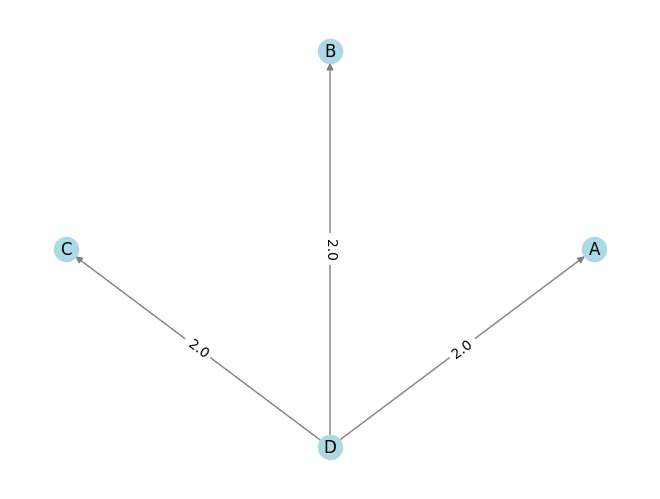

In [ ]:
# Import networkx and matplotlib
import networkx as nx
import matplotlib.pyplot as plt

# Create a network graph
G = nx.DiGraph()

# Add nodes for each station
for i in range(num_stations):
    G.add_node(stations[i])

# Add edges for each bike movement
for i in range(num_stations):
    for j in range(num_stations):
        if i != j and x[i, j].solution_value() > 0:
            G.add_edge(stations[i], stations[j], weight=x[i, j].solution_value())

# Draw the network graph with labels and edge weights
pos = nx.circular_layout(G) # You can choose other layouts as well
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray")
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()
